In [1]:
import pandas as pd

In [2]:
import numpy as np
#data = np.loadtxt(fname='categorized_particles.csv', delimiter=',')

In [3]:
df = pd.read_csv('categorized_particles.csv')

In [4]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


In [5]:
import matplotlib.pyplot as plt

In [6]:
df.shape

(114708, 22)

In [7]:
df.columns

Index(['particle_id', 'frame_num', 'particle_num', 'time_stamp_s', 'ecd_um',
       'area_pixels', 'perimeter', 'circularity', 'intensity_mean',
       'intensity_std', 'intensity_min', 'intensity_max', 'max_feret_diam_um',
       'aspect_ratio', 'x_left', 'x_right', 'y_top', 'y_bottom',
       'edge_particle', 'experiment', 'step', 'type'],
      dtype='object')

In [8]:
#df.set_index('particle_id', inplace=True) 

In [9]:
df.index

RangeIndex(start=0, stop=114708, step=1)

In [10]:
df.shape

(114708, 22)

In [11]:
df.head()

,particle_id,frame_num,particle_num,time_stamp_s,ecd_um,area_pixels,perimeter,circularity,intensity_mean,intensity_std,...,max_feret_diam_um,aspect_ratio,x_left,x_right,y_top,y_bottom,edge_particle,experiment,step,type
0,47,1,48,0.0,68.375,2401,1542.88,0.11,810.09,7.39,...,546.875,0.02,621,1035,945,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
1,52,1,53,0.0,15.375,211,243.15,0.21,812.77,5.53,...,69.875,0.09,380,438,951,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
2,54,1,55,0.0,17.625,257,275.88,0.21,812.89,6.12,...,76.375,0.09,442,505,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
3,55,1,56,0.0,9.625,114,106.88,0.35,813.95,5.71,...,31.625,0.19,513,542,950,957,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines
4,56,1,57,0.0,10.625,128,143.61,0.28,812.13,6.96,...,41.625,0.14,542,579,950,956,False,MTB_20160321_Schleren,25 KBID 146-0034 Rep 1_5200-3196_160321-112131,schlieren lines


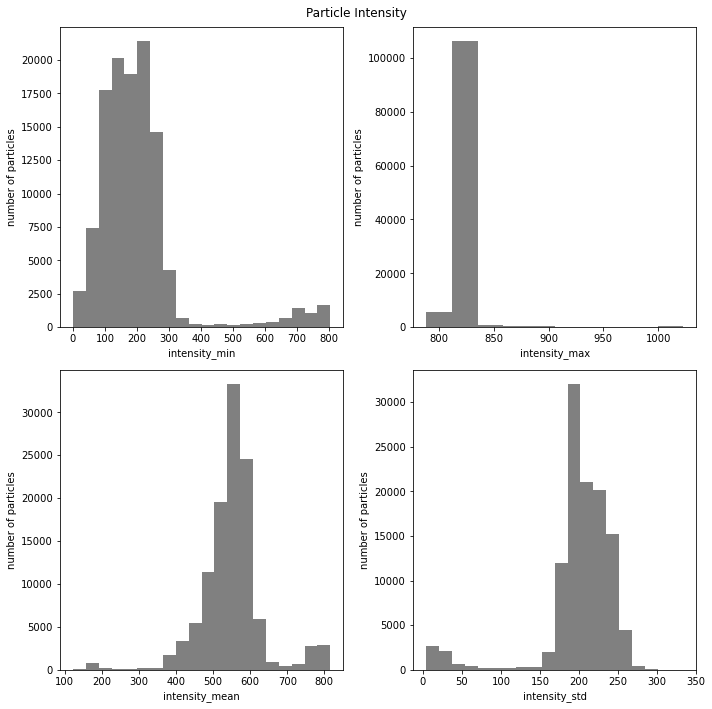

In [12]:
fig = plt.figure(figsize=(10, 10))

axes1 = fig.add_subplot(2, 2, 1) #row, column, which plot
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.set_xlabel('intensity_min')
axes1.set_ylabel('number of particles')
axes1.hist(df['intensity_min'], bins = 20, color = "grey")

axes2.set_xlabel('intensity_max')
axes2.set_ylabel('number of particles')
axes2.hist(df['intensity_max'], bins = 10, color = "grey")

axes3.set_xlabel('intensity_mean')
axes3.set_ylabel('number of particles')
axes3.hist(df['intensity_mean'], bins = 20, color = "grey")

axes4.set_xlabel('intensity_std')
axes4.set_ylabel('number of particles')
axes4.hist(df['intensity_std'], bins = 20, color = "grey")

fig.suptitle("Particle Intensity")

fig.tight_layout() #helps clean things up and for the white space 


plt.show()



Text(0, 0.5, 'circularity')

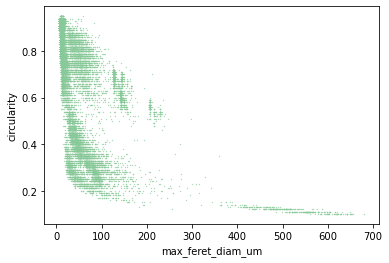

In [13]:
plt.scatter(df['max_feret_diam_um'], df['circularity'], s=0.1, color = '#88c999')

plt.show
plt.xlabel('max_feret_diam_um')
plt.ylabel('circularity')

In [14]:
types=df['type'].unique()
print(types)

['schlieren lines' 'translucent fibral' 'glass' 'dense globular' 'protein'
 'silicone oil' 'multi si oil' 'silicone oil agg.' 'dense fibral'
 'dense ring-like' 'translucent ring-like' 'translucent globular']


In [15]:
"""
probably a way to automate this but can't figure it out - christian

grouped_type=df.groupby("type")

for idx, name in enumerate(types):
    list[idx]=grouped_type.get_group(name)
return list
"""

'\nprobably a way to automate this but can\'t figure it out - christian\n\ngrouped_type=df.groupby("type")\n\nfor idx, name in enumerate(types):\n    list[idx]=grouped_type.get_group(name)\nreturn list\n'

In [16]:
grouped_type=df.groupby("type")
schlieren=grouped_type.get_group("schlieren lines")
translucent_fibral=grouped_type.get_group("translucent fibral")
glass=grouped_type.get_group("glass")
dense_glob=grouped_type.get_group("dense globular")
protein=grouped_type.get_group(types[4])
silicone_oil=grouped_type.get_group(types[5])
multi_si_oil=grouped_type.get_group(types[6])
silicone_agg=grouped_type.get_group(types[7])
dense_fibral=grouped_type.get_group(types[8])
dense_ring=grouped_type.get_group(types[9])
translucent_ring=grouped_type.get_group(types[10])
translucent_glob=grouped_type.get_group(types[11])

print("number of schlieren lines =", schlieren.shape[0])
print("number of translucent fibral particles =", translucent_fibral.shape[0])
print("number of glass particles =", glass.shape[0])
print("number of dense globular particles =", dense_glob.shape[0])
print("number of protein particles =", protein.shape[0])
print("number of silicone oil particles =", silicone_oil.shape[0])
print("number of multi silicone oil particles =", multi_si_oil.shape[0])
print("number of silicone aggregated particles =", silicone_agg.shape[0])
print("number of dense fibral particles =", dense_fibral.shape[0])
print("number of dense ring particles =", dense_ring.shape[0])
print("number of translucent ring-like particles =", translucent_ring.shape[0])
print("number of translucent globular particles =", translucent_glob.shape[0])

number of schlieren lines = 1675
number of translucent fibral particles = 4622
number of glass particles = 4959
number of dense globular particles = 41657
number of protein particles = 367
number of silicone oil particles = 58169
number of multi silicone oil particles = 3085
number of silicone aggregated particles = 40
number of dense fibral particles = 59
number of dense ring particles = 30
number of translucent ring-like particles = 31
number of translucent globular particles = 14


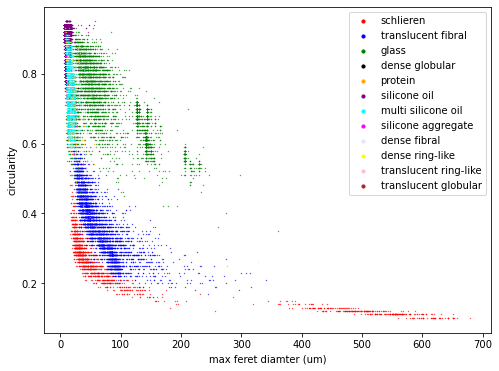

In [17]:

fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(1,1,1)

ax1.scatter(schlieren['max_feret_diam_um'], schlieren['circularity'], s=0.1, color = 'r', label="schlieren")
ax1.scatter(translucent_fibral['max_feret_diam_um'], translucent_fibral['circularity'], s=0.1, color = 'b', label="translucent fibral")
ax1.scatter(glass['max_feret_diam_um'], glass['circularity'], s=0.1, color = 'g', label="glass")
ax1.scatter(dense_glob['max_feret_diam_um'], dense_glob['circularity'], s=0.1, color = 'k', label="dense globular")
ax1.scatter(protein['max_feret_diam_um'], protein['circularity'], s=0.1, color = 'orange', label="protein")
ax1.scatter(silicone_oil['max_feret_diam_um'], silicone_oil['circularity'], s=0.1, color = 'purple', label="silicone oil")
ax1.scatter(multi_si_oil['max_feret_diam_um'], multi_si_oil['circularity'], s=0.1, color = 'cyan', label="multi silicone oil")
ax1.scatter(silicone_agg['max_feret_diam_um'], silicone_agg['circularity'], s=0.1, color = 'magenta', label="silicone aggregate")
ax1.scatter(dense_fibral['max_feret_diam_um'], dense_fibral['circularity'], s=0.1, color = 'lavender', label="dense fibral")
ax1.scatter(dense_ring['max_feret_diam_um'], dense_ring['circularity'], s=0.1, color = 'yellow', label="dense ring-like")
ax1.scatter(translucent_ring['max_feret_diam_um'], translucent_ring['circularity'], s=0.1, color = 'pink', label="translucent ring-like")
ax1.scatter(translucent_glob['max_feret_diam_um'], translucent_glob['circularity'], s=0.1, color = 'brown', label="translucent globular")


ax1.set_xlabel('max feret diamter (um)')
ax1.set_ylabel('circularity')

legend=plt.legend(markerscale=10)

plt.show()

#comment out particles you don't want to see

In [18]:
"""
from PIL import Image
im = Image.open("04_Silicon_Oil_image_00001.jpg")
left = df[0,1682].x_left
print(left)
"""

'\nfrom PIL import Image\nim = Image.open("04_Silicon_Oil_image_00001.jpg")\nleft = df[0,1682].x_left\nprint(left)\n'

In [19]:
"""
from PIL import Image

with Image.open("04_Silicon_Oil_Image_00001.jpg") as im:

    # The crop method from the Image module takes four coordinates as input.
    # The right can also be represented as (left+width)
    # and lower can be represented as (upper+height).
    (left, upper, right, lower) = (20, 20, 100, 100)

    # Here the image "im" is cropped and assigned to new variable im_crop
    im_crop = im.crop((left, upper, right, lower))

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_39680/2620168462.py, line 12)

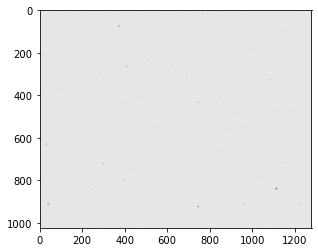

In [29]:
from skimage import io
import skimage.color

# import and read image
img = io.imread("Protein_Image_00010.jpg")

# display the grayscale image
fig, ax = plt.subplots()
plt.imshow(img, cmap="gray")

In [ ]:
from PIL import Image

#img = Image.open(path)	
# On successful execution of this statement, an object of Image type is returned and stored in img variable)
im = Image.open('withmed.jpg')
im.show('image',img)

filename = ""
with Image.open(filename) as image:
	width, height = image.size
#Image.size gives a 2-tuple and the width, height can be obtained

df = pd.read_csv('KBI Image')
ImageFolder = KBI Image
ProteinImages = []
SchlerenImages = []
AirbubbleImages = []
FiberImages = []
Other = []

for filename in ImageFolder:
    if filename.startswith('Protein'):
        ProteinImages.append(filename)
    elif filename.startswith('Schleren'):
        SchlerenImages.append(filename)
    elif filename.startswith('0')
        SiliconImages.append(filename)
    elif filename.startswith('Air')
        AirbubbleImages.append(filename)
    elif filename.startswith('fiber')
        FiberImages.append(filename)
    else:
        other.append(filename)


In [ ]:
df2 = pd.read_csv('fiber.csv')

In [ ]:
df3 = pd.read_csv('air_bubble_and